CLEANING DATA AKA PREPROCESSING

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

In [3]:
filepath = 'laptop_data.csv'
if not os.path.exists(filepath):
    print('File not found')
else:
    df= pd.read_csv(filepath, index_col= 0)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   528 non-null    object
 1   price   528 non-null    object
 2   link    528 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB
None


In [5]:
df[df['title'].duplicated()] # list all the duplicated titles 


,title,price,link
27,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...
31,MSI Modern 14 Core i5 10th Gen - (8 GB/512 GB ...,"₹41,990",/msi-modern-14-core-i5-10th-gen-8-gb-512-gb-ss...
39,MSI Bravo 15 Ryzen 5 Hexa Core 5600H - (8 GB/5...,"₹49,990",/msi-bravo-15-ryzen-5-hexa-core-5600h-8-gb-512...
43,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,"₹59,990",/lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
47,MSI Crosshair 15 Core i7 12th Gen - (16 GB/1 T...,"₹1,16,990",/msi-crosshair-15-core-i7-12th-gen-16-gb-1-tb-...
...,...,...,...
516,ASUS Vivobook Pro 15 OLED Ryzen 7 Octa Core 48...,"₹67,990",/asus-vivobook-pro-15-oled-ryzen-7-octa-core-4...
519,MSI Bravo 15 Ryzen 5 Hexa Core 5600H - (8 GB/5...,"₹49,990",/msi-bravo-15-ryzen-5-hexa-core-5600h-8-gb-512...
523,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,"₹59,990",/lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
526,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,"₹2,07,990",/asus-rog-zephyrus-g15-2022-90whr-battery-ryze...


In [ ]:
# we have to clean price and 

- f(x) = x*2

 -f(5)
 - f(230)
 - f(0.5)

- Lambda expression 
  - f = lambda x: x*2
  - f(5)
  - f(230)

In [6]:
for col in df:
    print(col)

title
price
link


In [7]:
for row in df.iterrows():  # this is stupid , dont use  this, use apply(), applymap() method
    print(row)

(0, title    MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...
price                                            ₹3,90,990
link     /msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...
Name: 0, dtype: object)
(1, title    Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...
price                                              ₹59,990
link     /lenovo-ideapad-gaming-3-ryzen-5-hexa-core-560...
Name: 1, dtype: object)
(2, title    ASUS Vivobook 15 Core i3 10th Gen - (8 GB/256 ...
price                                              ₹27,990
link     /asus-vivobook-15-core-i3-10th-gen-8-gb-256-gb...
Name: 2, dtype: object)
(3, title    MSI Modern 14 Ryzen 5 Hexa Core 5500U - (8 GB/...
price                                              ₹39,990
link     /msi-modern-14-ryzen-5-hexa-core-5500u-8-gb-51...
Name: 3, dtype: object)
(4, title    Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...
price                                              ₹48,990
link     /lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb...

In [ ]:
print(f(4))
g= lambda x,y : x+y **2
print(g(2,3))

In [16]:
df['price_clean']= df['price'].apply(lambda val: int(val[1:].replace(',','')))

In [14]:
#float('₹3,90,990'[1:].replace(',',''))

390990.0

In [13]:
#int('₹3,90,990'[1:].replace(',',''))

390990

In [19]:
df.sort_values(by='price_clean', ascending= False , inplace= True)

In [21]:
df.tail()

,title,price,link,price_clean
317,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹22,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,22990
188,ASUS (2022) Celeron Dual Core - (4 GB/128 GB S...,"₹22,990",/asus-2022-celeron-dual-core-4-gb-128-gb-ssd-w...,22990
288,Lenovo IdeaPad 1 Celeron Dual Core - (4 GB/256...,"₹21,513",/lenovo-ideapad-1-celeron-dual-core-4-gb-256-g...,21513
485,Avita SATUS ULTIMUS S111 Celeron Dual Core - (...,"₹21,490",/avita-satus-ultimus-s111-celeron-dual-core-4-...,21490
78,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹18,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,18990


In [29]:
def clean_title(title):
    return title.split('-')[0].strip(),title.split('-')[1].strip()

df[['name','configuration']]=df['title'].apply(clean_title).apply(pd.Series)

In [30]:
def get_brand(name):
    return name.split()[0]

df['brand']=df['name'].apply(get_brand)

In [31]:
df

,title,price,link,price_clean,name,configuration,brand
510,ASUS ROG Zephyrus Duo 16 Ryzen 9 Octa Core 690...,"₹3,91,990",/asus-rog-zephyrus-duo-16-ryzen-9-octa-core-69...,391990,ASUS ROG Zephyrus Duo 16 Ryzen 9 Octa Core 6900HX,(32 GB/2 TB SSD/Windows 11 Home/16 GB Graphics...,ASUS
0,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990,MSI Core i9 12th Gen,(32 GB/2 TB SSD/Windows 11 Home/16 GB Graphics...,MSI
275,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990,MSI Core i9 12th Gen,(32 GB/2 TB SSD/Windows 11 Home/16 GB Graphics...,MSI
27,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990,MSI Core i9 12th Gen,(32 GB/2 TB SSD/Windows 11 Home/16 GB Graphics...,MSI
363,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,"₹3,90,990",/msi-core-i9-12th-gen-32-gb-2-tb-ssd-windows-1...,390990,MSI Core i9 12th Gen,(32 GB/2 TB SSD/Windows 11 Home/16 GB Graphics...,MSI
...,...,...,...,...,...,...,...
317,Infinix INBook X1 Neo Series Celeron Quad Core...,"₹22,990",/infinix-inbook-x1-neo-series-celeron-quad-cor...,22990,Infinix INBook X1 Neo Series Celeron Quad Core,(8 GB/256 GB SSD/Windows 11 Home) XL22 Thin an...,Infinix
188,ASUS (2022) Celeron Dual Core - (4 GB/128 GB S...,"₹22,990",/asus-2022-celeron-dual-core-4-gb-128-gb-ssd-w...,22990,ASUS (2022) Celeron Dual Core,(4 GB/128 GB SSD/Windows 11 Home) BR1100CKA,ASUS
288,Lenovo IdeaPad 1 Celeron Dual Core - (4 GB/256...,"₹21,513",/lenovo-ideapad-1-celeron-dual-core-4-gb-256-g...,21513,Lenovo IdeaPad 1 Celeron Dual Core,(4 GB/256 GB SSD/Windows 11 Home) 11IGL05 Thin...,Lenovo
485,Avita SATUS ULTIMUS S111 Celeron Dual Core - (...,"₹21,490",/avita-satus-ultimus-s111-celeron-dual-core-4-...,21490,Avita SATUS ULTIMUS S111 Celeron Dual Core,(4 GB/128 GB SSD/Windows 11 Home) NU14A1INC43PN,Avita


In [33]:
df['brand'].value_counts()

ASUS         128
MSI          127
Lenovo        72
DELL          58
HP            57
APPLE         28
acer          26
Infinix       17
LG             4
realme         4
RedmiBook      2
ALIENWARE      1
Mi             1
Nokia          1
SAMSUNG        1
Avita          1
Name: brand, dtype: int64

<AxesSubplot: title={'center': 'brand distribution'}>

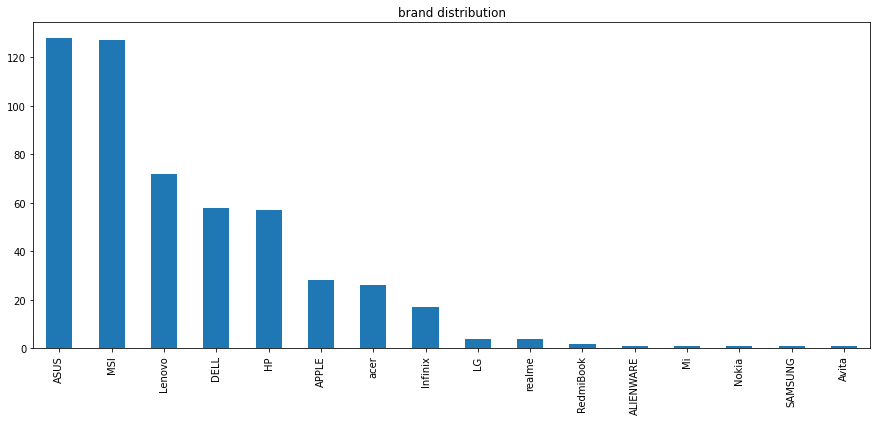

In [34]:
df['brand'].value_counts().plot(kind='bar',title='brand distribution',figsize=(15,6))

<AxesSubplot: title={'center': 'price distribution'}>

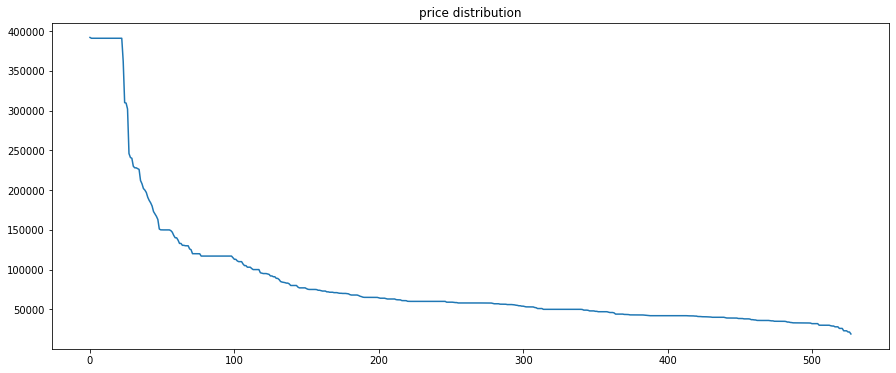

In [35]:
df['price_clean'].plot(kind='line',use_index=False,title='price distribution',figsize=(15,6))

<AxesSubplot: >

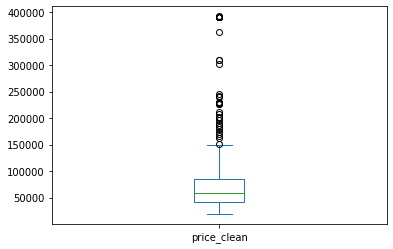

In [36]:
df['price_clean'].plot(kind='box')